In [42]:
import pandas as pd
import sonify
import numpy as np
import matplotlib.pyplot as plt

In [18]:
#calaculates average for each week in last year (52 weeks)
#returns 52 data points, each for one week (turns to be around 25 seconds of sound)
#OUR METHOD FOR YEAR DATA
def data_year(data):
    week_avgs = np.array([])
    for a in range(0, 96*7*52, 96*7):
        week = data[a:a+96*7]
        avg = week.mean()
        week_avgs = np.append(week_avgs, avg)
    return week_avgs

In [19]:
#splits the day in 6 parts, 96 data points per day, day split by 16 for weekly data
#returns 42 data points
#OUR METHOD FOR WEEK DATA
def data_week(data):
    week_avg = np.array([])
    for a in range(0, 16*6*7, 16):
        week = data[a:a+16]
        avg = week.mean()
        week_avg = np.append(week_avg, avg)
    return week_avg

In [20]:
#splits the day in 2 parts, 96 data points per day, split by 42 for monthly data
#returns 60 data points
#OUR METHOD FOR MONTH DATA
def data_month(data):
    month_avg = np.array([])
    for a in range(0, 42*2*30, 42):
        month = data[a:a+42]
        avg = month.mean()
        month_avg = np.append(month_avg, avg)
    return month_avg

In [68]:
#function for a visual representation of the data 
def plot_data(x, y, x_label, y_label, title):
    fig, ax = plt.subplots()
    ax.plot(x, y)
    ax.set(xlabel=x_label, ylabel=y_label, title=title)
    ax.grid()
    plt.show()

In [21]:
#reading the data
water_data = pd.read_csv('adaSensorData.csv')

In [73]:
#reading temperature data
temp = water_data['Temp']
temp_week = data_week(temp)
temp_month = data_month(temp)
temp_year = data_year(temp)

In [74]:
#saving the data into the right format for sonification
#index values
week_index = []
for i in range(0, 42):
    week_index.append(i)
month_index = []
for i in range(0, 60):
    month_index.append(i)
year_index = []
for i in range(0, 52):
    year_index.append(i)
week_data = list(zip(week_index, temp_week))
month_data =list(zip(month_index, temp_month))
year_data = list(zip(year_index, temp_year))

In [75]:
#playing week data
sonify.play_midi_from_data(week_data)

Done playing!


In [76]:
#playing month data
sonify.play_midi_from_data(month_data)

Done playing!


In [77]:
#playing year data
sonify.play_midi_from_data(year_data)

Done playing!


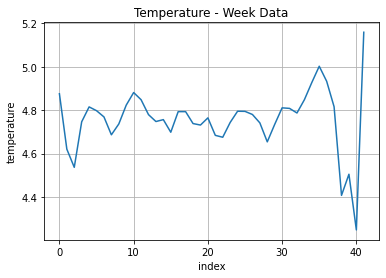

In [78]:
#plot for weekly data
plot_data(week_index, temp_week, "index", "temperature", "Temperature - Week Data")

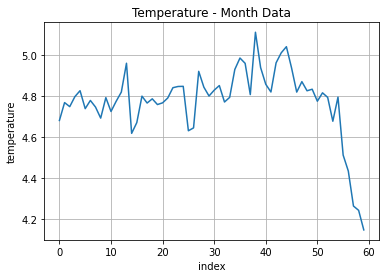

In [79]:
#plot for monthly data
plot_data(month_index, temp_month, "index", "temperature", "Temperature - Month Data")

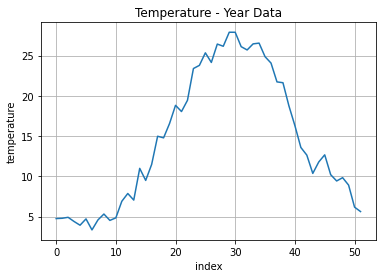

In [80]:
#plot for yearly data
plot_data(year_index, temp_year, "index", "temperature", "Temperature - Year Data")